In [260]:
"""
updated 2019-08-06 
written by Minhae Kwon
Linear regression for "Encoding" Process
ref: https://chrisalbon.com/machine_learning/linear_regression/linear_regression_using_scikit-learn/
     https://datatofish.com/multiple-linear-regression-python/

cross validate score: Coefficient of determination
https://en.wikipedia.org/wiki/Coefficient_of_determination
"""

from pandas import DataFrame, read_csv
#from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt

bb_df = read_csv('./data/bb_df.csv') #behavior belief =[belief for box1, beleif for box2]
r_df = read_csv('./data/r_df.csv') # 300 neuron response

TEST_SIZE = 0.2  # ratio of test data set 
N_SPLITS = 10 # "K" in K-fold cross validation 

### there are 3 types of data: test data, train data, validation data

In [261]:
# separate test data set
r_df_train, r_df_test, bb_df_train, bb_df_test = train_test_split(r_df, bb_df, test_size=TEST_SIZE, random_state = 1)

In [262]:
regr = LinearRegression() # linear regression is used for encoding process

In [263]:
# now we use only train data 
# why use StratifiedKFold?: The folds are made by preserving the percentage of samples for each class.
X = r_df_train.to_numpy()
y = bb_df_train.to_numpy()
k_fold = StratifiedKFold(n_splits=N_SPLITS) # seperate train data and validation data

In [265]:
# why argmax(1)? split cannot simply handle multidimension y. 
# ref: https://stackoverflow.com/questions/48508036/sklearn-stratifiedkfold-valueerror-supported-target-types-are-binary-mul
for i, (train_index, val_index) in enumerate(k_fold.split(X, y.argmax(1))):
    #print("TRAIN:", train_index, "TEST:", val_index)
    x_train_kf, x_val_kf = X[train_index], X[val_index]
    y_train_kf, y_val_kf = y[train_index], y[val_index]
    #print(x_train_kf)
    #print(y_train_kf)
    regr.fit(x_train_kf, y_train_kf) # fit the model
    nb_val = regr.predict(x_val_kf) # predict based on current model -> use validation data for evaluation
    print('score', r2_score(y_val_kf, nb_val, multioutput='raw_values')) # get r2 score

score [1. 1.]
score [1. 1.]
score [1. 1.]
score [1. 1.]
score [1. 1.]
score [1. 1.]
score [1. 1.]
score [1. 1.]
score [1. 1.]
score [1. 1.]


### Linear regression model: B = W * r + c 

In [266]:
"""
c = Intercept
B (behavior belief) N x 2 dimension (N: # of data)
W (Coef): 2 x 300 dimension
r(neural response - 300 neurons) N x 300 dimension
"""

print('Intercept: ', regr.intercept_)
print('Coef: ', regr.coef_)


Intercept:  [0.08159064 0.14304911]
Coef:  [[ 5.85800195e-03  9.35839215e-03 -1.59702473e-02  4.51308006e-02
  -4.63073439e-02 -3.47645620e-03  1.24541666e-02  6.33006724e-02
  -9.39338266e-04  2.08965339e-02  1.57204478e-03 -4.11398487e-02
   1.09673460e-02 -1.34580738e-02 -2.42116669e-02 -3.45607243e-02
  -4.85230732e-02  2.24570353e-02 -4.53351651e-02 -1.64634420e-02
   6.74018733e-02  2.22742258e-02  3.33780736e-02  1.50869316e-02
  -2.91419261e-02  1.25681429e-03  4.43079080e-02  3.22126077e-02
  -4.24613441e-02 -1.54733791e-02 -2.27100900e-02 -4.67519694e-02
   1.87230712e-02  2.88124550e-02  2.31528205e-02  1.20701441e-03
  -2.26490616e-02  1.96624058e-02  5.60522286e-02 -2.12998220e-02
   1.86211432e-02  2.71459369e-02  4.93019048e-02 -2.99019221e-02
  -3.00769998e-02 -2.43045497e-03 -7.98703115e-04 -3.38791468e-02
   1.56938161e-02  1.65410320e-02 -3.46245354e-02 -3.98487391e-02
   1.40451891e-02  2.52954410e-02  1.12389268e-02 -3.77528906e-02
   4.14221844e-03 -2.15916190e-01

(2, 300)

### evaluate model with test data

In [267]:
nb_test = regr.predict(r_df_test)

encoding_error = bb_df_test - nb_test # true - estimate
print('mean encoding error mean: \n', np.mean(encoding_error, axis=0))
print('mean encoding error std:\n', np.std(encoding_error, axis=0))
print('score', r2_score(bb_df_test, nb_test, multioutput='raw_values'))

mean encoding error mean: 
 behavior_belief1    2.741873e-08
behavior_belief2    2.798117e-08
dtype: float64
mean encoding error std:
 behavior_belief1    9.770811e-07
behavior_belief2    1.181502e-06
dtype: float64
score [1. 1.]


In [268]:
nb_df_test = DataFrame(nb_test, columns = bb_df.columns) 

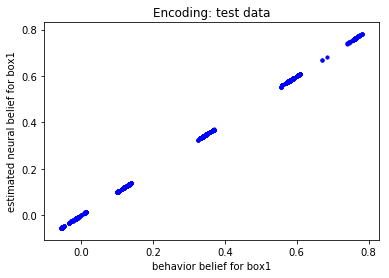

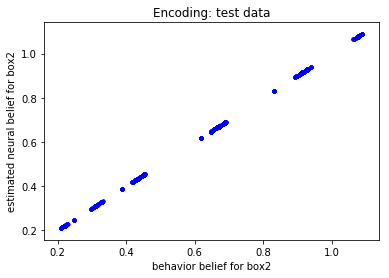

In [269]:

# plot: compare raw data vs prediction
plt.scatter(bb_df_test['behavior_belief1'], nb_df_test['behavior_belief1'], s=10, c='blue', marker='o')
plt.xlabel('behavior belief for box1')
plt.ylabel('estimated neural belief for box1')
plt.title('Encoding: test data')
plt.show()

plt.scatter(bb_df_test['behavior_belief2'], nb_df_test['behavior_belief2'], s=10, c='blue', marker='o')
plt.xlabel('behavior belief for box2')
plt.ylabel('estimated neural belief for box2')
plt.title('Encoding: test data')
plt.show()

### build neural belief data using the learned model

In [247]:
#neural estimate of belief using current linear regression model
nb= regr.predict(r_df) 
nb_df = DataFrame(nb, columns = bb_df.columns)
#save neural estimate belief
nb_df.to_csv(path_or_buf='./data/nb_df.csv',index=False)

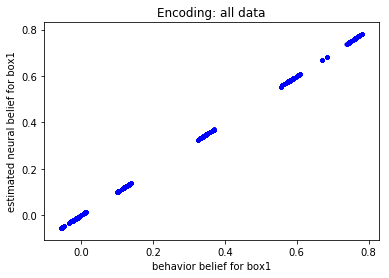

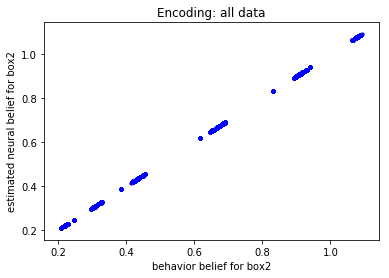

In [248]:
# plot: compare raw data vs prediction
plt.scatter(bb_df['behavior_belief1'], nb_df['behavior_belief1'], s=10, c='blue', marker='o')
plt.xlabel('behavior belief for box1')
plt.ylabel('estimated neural belief for box1')
plt.title('Encoding: all data')
plt.show()

plt.scatter(bb_df['behavior_belief2'], nb_df['behavior_belief2'], s=10, c='blue', marker='o')
plt.xlabel('behavior belief for box2')
plt.ylabel('estimated neural belief for box2')
plt.title('Encoding: all data')
plt.show()

# separation

In [ ]:
X = r_df_train.to_numpy()
y = bb_df_train.to_numpy()
k_fold = StratifiedKFold(n_splits=10)
for i, (train_index, val_index) in enumerate(k_fold.split(X, y.argmax(1))):
    print("TRAIN:", train_index, "TEST:", val_index)
    x_train_kf, x_val_kf = X[train_index], X[val_index]
    y_train_kf, y_val_kf = y[train_index], y[val_index]

In [87]:
regr = LinearRegression()

w = regr.fit(r_df_train, bb_df_train)

In [111]:
pipe_lr = Pipeline([('regr', LinearRegression())])


model = pipe_lr.named_steps['regr']

scores = cross_val_score(estimator = pipe_lr,
                        X = r_df_train,
                        y = bb_df_train,
                        cv = 10,
                        n_jobs = -1)

In [112]:
model = pipe_lr.named_steps['regr']
print('Intercept: ', model.intercept_)

AttributeError: 'LinearRegression' object has no attribute 'intercept_'

In [104]:
regr = LinearRegression()
scores = cross_val_score(regr,
                        X = r_df_train,
                        y = bb_df_train,
                        cv = 10,
                        n_jobs = -1)

In [105]:
print('Cross Validation Scores: %s' %scores)

Cross Validation Scores: [-1.24060099e+14  8.72544824e-01 -1.95771062e+12  7.72886358e-01
 -2.94483444e+11  8.36573381e-01 -5.58550577e+11 -3.52230398e+12
 -3.49475385e+13 -3.74730350e+12]


In [106]:
#print('Intercept: ', w.intercept_)
print('Intercept: ', regr.intercept_)

AttributeError: 'LinearRegression' object has no attribute 'intercept_'

In [91]:
print('Coef: ', w.coef_)

Coef:  [[ 4.75389153e-02  1.49252480e-02 -3.63707057e-03  4.55486784e-02
  -5.03106681e-02  4.04884026e-03  1.29223281e-03  6.71121016e-02
   1.53682999e-02  3.23040090e-02  3.41285545e-03 -4.31594098e-02
   7.46658883e-03  1.06096351e-02 -2.28513340e-02 -3.92700555e-02
  -4.27068819e-02  2.23545244e-02 -3.66439916e-02 -1.45561684e-02
   6.34273029e-02  1.29905905e-02  3.80457757e-02  1.28183775e-02
  -3.47035517e-02 -5.02677365e-04  5.66617907e-02  4.38316887e-02
  -3.66332996e-02 -2.57625015e-02 -2.22766670e-02 -5.17607174e-02
   2.05020410e-02  3.09377301e-02  1.00231844e-02 -3.00515532e-03
  -2.10132019e-02  1.92429418e-02  4.65112795e-02 -2.61035735e-02
   1.57701786e-02  2.66542453e-02  4.34050142e-02 -3.20421208e-02
  -2.65162762e-02 -8.39227836e-03 -5.37778990e-04 -1.78668116e-02
   1.82190353e-02  1.37924754e-02 -3.60376450e-02 -3.35055377e-02
  -4.20663717e-04  2.22130694e-02  1.96645793e-02 -4.97399961e-02
   8.68556227e-03 -2.16496895e-01  7.08109513e-03 -2.39249029e-02
  -

In [92]:
nb = w.predict(r_df_test)

print(nb)

[[ 0.11592128  0.66345167]
 [-0.00761879  1.07565546]
 [-0.01322157  1.07448196]
 ...
 [ 0.34144843  0.66020584]
 [-0.02103451  0.39073229]
 [ 0.34988588  0.40804911]]


In [93]:
nb.shape

(2000, 2)

In [94]:
encoding_error = bb_df_test - nb
print('mean encoding error mean: \n', np.mean(encoding_error, axis=0))
print('mean encoding error std:\n', np.std(encoding_error, axis=0))

mean encoding error mean: 
 behavior_belief1   -2.832945e-08
behavior_belief2   -1.163098e+04
dtype: float64
mean encoding error std:
 behavior_belief1         0.000001
behavior_belief2    576242.224295
dtype: float64


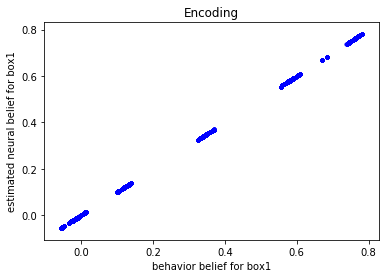

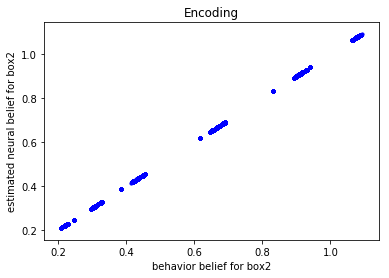

In [270]:

# plot: compare raw data vs prediction
plt.scatter(bb_df['behavior_belief1'], nb_df['behavior_belief1'], s=10, c='blue', marker='o')
plt.xlabel('behavior belief for box1')
plt.ylabel('estimated neural belief for box1')
plt.title('Encoding')
plt.show()

plt.scatter(bb_df['behavior_belief2'], nb_df['behavior_belief2'], s=10, c='blue', marker='o')
plt.xlabel('behavior belief for box2')
plt.ylabel('estimated neural belief for box2')
plt.title('Encoding')
plt.show()